In [1]:
import scipy.io
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
def averaging(df, averageing_column, idx_start, idx_end, averaged_column):
    average = df[averageing_column][idx_start:idx_end].mean()
    df[averaged_column] = average
    return df, average

In [3]:
def addspeed(df):
    speed = (df['Moving1.Position [deg]'][10] - df['Moving1.Position [deg]'][9]) / (
                df['Time [ms]'][10] - df['Time [ms]'][9]) * (1000 / 6)
    df['Speed'] = speed
    return df, speed

In [4]:
def losses(df, speed, loss):
    if 7745 < speed < 7755:
        if loss == 'Hystersis':
            df, hysloss_rotor = averaging(df, 'HysteresisLoss(rotor_steel) [W]', 0, 500,
                                      'Average_HysteresisLoss(rotor)')
            df, hysloss_stator = averaging(df, 'HysteresisLoss(stator_steel) [W]', 0, 500,
                                       'Average_HysteresisLoss(stator)')
            return df, hysloss_rotor, hysloss_stator
        elif loss == 'Eddy':
            df, eddyloss_rotor = averaging(df, 'EddyCurrentLoss(rotor_steel) [W]', 0, 500,
                                          'Average_EddyLoss(rotor)')
            df, eddyloss_stator = averaging(df, 'EddyCurrentLoss(stator_steel) [W]', 0, 500,
                                           'Average_EddyLoss(stator)')
            return df, eddyloss_rotor, eddyloss_stator
        elif loss == 'Stranded':
            df, strandedloss = averaging(df, 'StrandedLoss [W]', 0, 500,
                                            'Average_StrandedLoss')
            return df, strandedloss

    elif 7995 < speed < 8005:
        if loss == 'Hystersis':
            df, hysloss_rotor = averaging(df, 'HysteresisLoss(rotor_steel) [W]', 0, 500,
                                          'Average_HysteresisLoss(rotor)')
            df, hysloss_stator = averaging(df, 'HysteresisLoss(stator_steel) [W]', 0, 500,
                                           'Average_HysteresisLoss(stator)')
            return df, hysloss_rotor, hysloss_stator
        elif loss == 'Eddy':
            df, eddyloss_rotor = averaging(df, 'EddyCurrentLoss(rotor_steel) [W]', 0, 500,
                                           'Average_EddyLoss(rotor)')
            df, eddyloss_stator = averaging(df, 'EddyCurrentLoss(stator_steel) [W]', 0, 500,
                                            'Average_EddyLoss(stator)')
            return df, eddyloss_rotor, eddyloss_stator
        elif loss == 'Stranded':
            df, strandedloss = averaging(df, 'StrandedLoss [W]', 0, 500,
                                         'Average_StrandedLoss')
            return df, strandedloss
    elif 8445 < speed < 8505:
        if loss == 'Hystersis':
            df, hysloss_rotor = averaging(df, 'HysteresisLoss(rotor_steel) [W]', 0, 500,
                                          'Average_HysteresisLoss(rotor)')
            df, hysloss_stator = averaging(df, 'HysteresisLoss(stator_steel) [W]', 0, 500,
                                           'Average_HysteresisLoss(stator)')
            return df, hysloss_rotor, hysloss_stator
        elif loss == 'Eddy':
            df, eddyloss_rotor = averaging(df, 'EddyCurrentLoss(rotor_steel) [W]', 0, 500,
                                           'Average_EddyLoss(rotor)')
            df, eddyloss_stator = averaging(df, 'EddyCurrentLoss(stator_steel) [W]', 0, 500,
                                            'Average_EddyLoss(stator)')
            return df, eddyloss_rotor, eddyloss_stator
        elif loss == 'Stranded':
            df, strandedloss = averaging(df, 'StrandedLoss [W]', 0, 500,
                                         'Average_StrandedLoss')
            return df, strandedloss
    elif 9245 < speed < 9255:
        if loss == 'Hystersis':
            df, hysloss_rotor = averaging(df, 'HysteresisLoss(rotor_steel) [W]', 0, 500,
                                          'Average_HysteresisLoss(rotor)')
            df, hysloss_stator = averaging(df, 'HysteresisLoss(stator_steel) [W]', 0, 500,
                                           'Average_HysteresisLoss(stator)')
            return df, hysloss_rotor, hysloss_stator
        elif loss == 'Eddy':
            df, eddyloss_rotor = averaging(df, 'EddyCurrentLoss(rotor_steel) [W]', 0, 500,
                                           'Average_EddyLoss(rotor)')
            df, eddyloss_stator = averaging(df, 'EddyCurrentLoss(stator_steel) [W]', 0, 500,
                                            'Average_EddyLoss(stator)')
            return df, eddyloss_rotor, eddyloss_stator
        elif loss == 'Stranded':
            df, strandedloss = averaging(df, 'StrandedLoss [W]', 0, 500,
                                         'Average_StrandedLoss')
            return df, strandedloss

In [6]:
class DataExtract:
    def __init__(self, main_directory, specific_files, column_list):
        self.main_directory = main_directory
        self.column_list = column_list
        self.specific_files = specific_files
        self.dataset = pd.DataFrame()
        self.datafile = pd.DataFrame()
        self.average_speed = []
        self.average_torque = []
        self.average_id = []
        self.average_iq = []
        self.average_ud = []
        self.average_uq = []
        self.hysteresisloss_rotor = []
        self.hysteresisloss_stator = []
        self.strandedloss = []
        self.eddycurrentloss_rotor = []
        self.eddycurrentloss_stator = []
        self.p = 6

    def generate(self):
        # Iterate through each subdirectory in the main directory
        global speed
        for root, dirs, files in os.walk(self.main_directory):
            dirs.sort()  # Sort directories for consistent processing
            for subdir in dirs:
                # print("Subdirectory:", subdir)
                subdir_path = os.path.join(root, subdir)
                
                # Walk through the subdirectory to find its subdirectories
                for subroot, subdirs, subfiles in os.walk(subdir_path):
                    subdirs.sort()  # Sort subdirectories
                    for subsubdir in subdirs:
                        # print("Sub-subdirectory:", subsubdir)
                        subsubdir_path = os.path.join(subroot, subsubdir)
                        self.datafile = pd.DataFrame()

                        # Iterate through each file in the sub-subdirectory
                        for file_name in self.specific_files:
                            file_path = os.path.join(subsubdir_path, file_name)
                            # print("File path:", file_path)
                        
                            # Check if it's a file and process based on file type
                            if os.path.isfile(file_path):
                                if file_name.endswith('.csv'):
                                    #print(f'Reading CSV file: {file_path}')
                                    if file_name == 'Winkel_el_mech.csv':
                                        df_csv = pd.read_csv(file_path)
                                        df_csv = df_csv[df_csv.columns][1:]
                                        df_csv, speed = addspeed(df_csv)
                                        self.average_speed.append(speed)
                                    # elif file_name == 'Hystereseverluste.csv':
                                    #     df_csv = pd.read_csv(file_path)
                                    #     df_csv = df_csv[df_csv.columns][1:]
                                    #     df_csv, hysloss_rotor, hysloss_stator = losses(df_csv, speed, 'Hystersis')
                                    #     self.hysteresisloss_rotor.append(hysloss_rotor)
                                    #     self.hysteresisloss_stator.append(hysloss_stator)
                                    # elif file_name == 'Wicklungsverluste.csv':
                                    #     df_csv = pd.read_csv(file_path)
                                    #     df_csv = df_csv[df_csv.columns][1:]
                                    #     df_csv, stranded_loss = losses(df_csv, speed, 'Stranded')
                                    #     self.strandedloss.append(stranded_loss)
                                    # elif file_name == 'Wirbelstromverluste.csv':
                                    #     df_csv = pd.read_csv(file_path)
                                    #     df_csv = df_csv[df_csv.columns][1:]
                                    #     df_csv, eddyloss_rotor, eddyloss_stator = losses(df_csv, speed, 'Eddy')
                                    #     self.eddycurrentloss_rotor.append(eddyloss_rotor)
                                    #     self.eddycurrentloss_stator.append(eddyloss_stator)
                                    elif file_name == 'Drehmoment.csv':
                                        df_csv = pd.read_csv(file_path)
                                        df_csv = df_csv[df_csv.columns][1:]
                                        df_csv, torque = averaging(df_csv, 'Moving1.Torque [NewtonMeter]', 0, 40000,'Average Torque')
                                        self.average_torque.append(torque)
                                    else:
                                        df_csv = pd.read_csv(file_path)
                                        df_csv = df_csv[df_csv.columns][1:]

                                    self.datafile = pd.concat([self.datafile, df_csv], axis=1)

                                elif file_name.endswith('.mat'):
                                    #print(f'Reading MAT file: {file_path}')
                                    mat_data = scipy.io.loadmat(file_path)
                                    df_mat = pd.DataFrame()
                                    #print(mat_data.keys())
                                    if file_name == 'i_abc.mat':
                                        data = mat_data['i_abc']
                                        # Convert the data to a pandas DataFrame
                                        df_mat = pd.DataFrame(data)
                                        df_mat.columns = ['i_a', 'i_b', 'i_c']
                                        df_mat = df_mat[df_mat.columns][1:]
                                    elif file_name == 'i_dq.mat':
                                        data = mat_data['i_dq']
                                        # Convert the data to a pandas DataFrame
                                        df_mat = pd.DataFrame(data)
                                        df_mat.columns = ['i_d', 'i_q']
                                        df_mat = df_mat[df_mat.columns][1:]
                                        df_mat, i_d_avg = averaging(df_mat, 'i_d', 0, 40000, 'i_d_average')
                                        self.average_id.append(i_d_avg)
                                        df_mat, i_q_avg = averaging(df_mat, 'i_q', 0, 40000, 'i_q_average')
                                        self.average_iq.append(i_q_avg)
                                    elif file_name == 'u_dq.mat':
                                        data = mat_data['u_dq']
                                        # Convert the data to a pandas DataFrame
                                        df_mat = pd.DataFrame(data)
                                        df_mat.columns = ['u_d', 'u_q']
                                        df_mat = df_mat[df_mat.columns][1:]
                                        df_mat, u_d_avg = averaging(df_mat, 'u_d', 0, 40000, 'u_d_average')
                                        self.average_ud.append(u_d_avg)
                                        df_mat, u_q_avg = averaging(df_mat, 'u_q', 0, 40000, 'u_q_average')
                                        self.average_uq.append(u_q_avg)

                                    self.datafile = pd.concat([self.datafile, df_mat], axis=1)
                        
                        self.datafile.loc[:, "File Name"] = str(subsubdir)
                        self.datafile.loc[:, "OPP"] = str(subdir)
                        
                        self.dataset = pd.concat([self.dataset, self.datafile], axis=0)
            break
        
        self.dataset['sin(Phi_el [])'] = np.sin(np.deg2rad(self.dataset['Phi_el []']))
        self.dataset['cos(Phi_el [])'] = np.cos(np.deg2rad(self.dataset['Phi_el []']))

        # self.dataset['sin(-5*Phi_el [])'] = np.sin(np.deg2rad(-5 * self.dataset['Phi_el []']))
        # self.dataset['cos(-5*Phi_el [])'] = np.cos(np.deg2rad(-5 * self.dataset['Phi_el []']))

        # self.dataset['sin(7*Phi_el [])'] = np.sin(np.deg2rad(7* self.dataset['Phi_el []']))
        # self.dataset['cos(7*Phi_el [])'] = np.cos(np.deg2rad(7* self.dataset['Phi_el []']))

        # self.dataset['sin(-11*Phi_el [])'] = np.sin(np.deg2rad(-11 * self.dataset['Phi_el []']))
        # self.dataset['cos(-11*Phi_el [])'] = np.cos(np.deg2rad(-11 * self.dataset['Phi_el []']))

        # self.dataset['sin(13*Phi_el [])'] = np.sin(np.deg2rad(13 * self.dataset['Phi_el []']))
        # self.dataset['cos(13*Phi_el [])'] = np.cos(np.deg2rad(13 * self.dataset['Phi_el []']))

        self.dataset['Electrical_frequency(Hz)'] = self.dataset['Speed']*(self.p/120)

    def visualisation(self, data):
        _ , axs = plt.subplots(1, 2, figsize = (12,4))
        axs[0].scatter(self.average_speed, self.average_torque)
        axs[0].set_xlabel("Rotational speed")
        axs[0].set_ylabel("Torque")
        axs[0].set_title(data) 
        
        axs[1].scatter(self.average_iq, self.average_id)
        axs[1].set_xlabel(f"i_q")
        axs[1].set_ylabel(f"i_d")
        axs[1].set_title(data)
        
        plt.show()

        # Create a new figure
        # fig = plt.figure()
        # ax = fig.add_subplot(111, projection='3d')

        # # Create a 3D scatter plot
        # ax.scatter(self.average_torque, self.average_speed, self.hysteresisloss_rotor, c='r', marker='o')

        # # Set labels
        # ax.set_xlabel('Torque')
        # ax.set_ylabel('Speed')
        # ax.set_zlabel('Hysteresisloss Rotor')

        # # Set title
        # ax.set_title('3D Scatter Plot')

        # Show plot
        # plt.show()

    def save(self, path, file_name1, file_name2):
        self.dataset = self.dataset[self.column_list]
        self.dataset = self.dataset.loc[:, ~self.dataset.columns.duplicated()]
        full_path = path + file_name1
        self.dataset.to_csv(full_path)
        full_path = path + file_name2
        self.dataset.to_hdf(full_path, key="table")

In [7]:
# List of specific file names
files = ['SpannungLeiterLeiter.csv', 'Strangstrom.csv', 'Drehmoment.csv', 'i_abc.mat', 'i_dq.mat', 'u_dq.mat', 'Winkel_el_mech.csv']

columns = ["File Name", "OPP",'Time [ms]', 'VM9.V [V]', 'VM7.V [V]', 'VM8.V [V]', 'u_d', 'u_q', 'Phi_el []','sin(Phi_el [])','cos(Phi_el [])', 'frq_el [Hz]','Electrical_frequency(Hz)','Speed', 'i_a', 'i_b', 'i_c', 'i_d', 'i_q',
           'i_d_average', 'i_q_average','Moving1.Torque [NewtonMeter]', 'Average Torque', 'Moving1.Position [deg]']

/Users/chiragangadi/anaconda3/lib/python3.11/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
/Users/chiragangadi/anaconda3/lib/python3.11/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
/Users/chiragangadi/anaconda3/lib/python3.11/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
/Users/chiragangadi/anaconda3/lib/python3.11/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Dupli

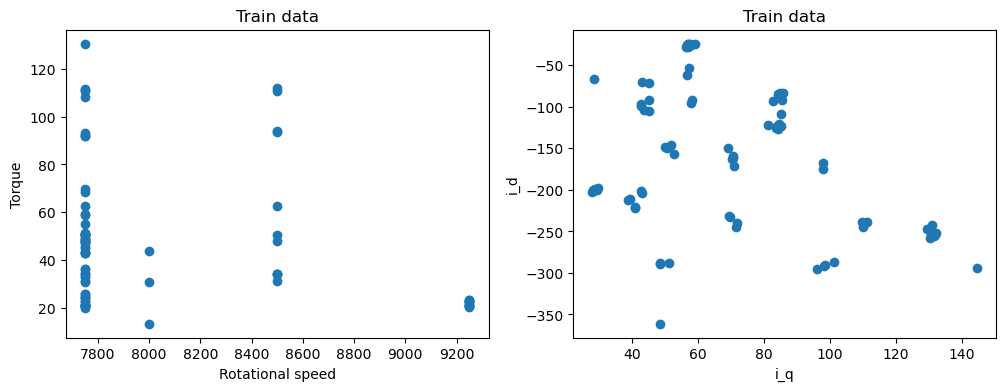

In [8]:
# Specify the main directory
train_path = '/Users/chiragangadi/Uni Siegen/WHB_IAS/02_Data/Updated dataset'

train_data = DataExtract(train_path, files, columns)
train_data.generate()
train_data.visualisation("Train data")
train_data.save(train_path, "/train_dataset.csv", "/train_dataset.h5")

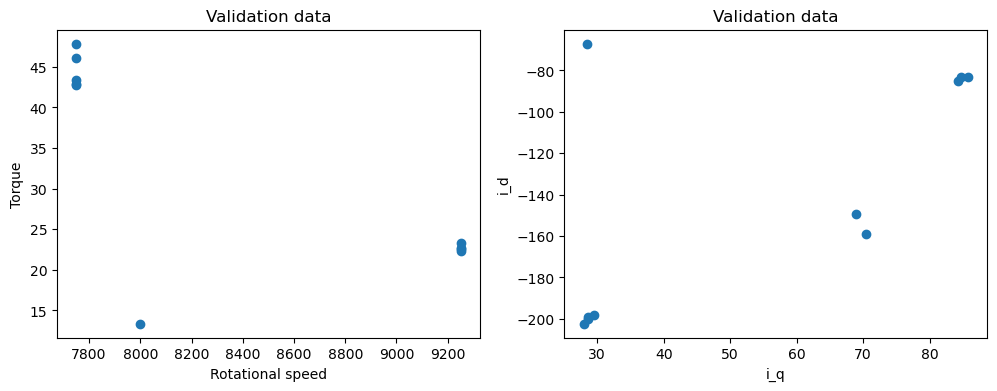

In [8]:
# Specify the main directory
val_path = '/Users/chiragangadi/Uni Siegen/WHB_IAS/02_Data/Validation'

val_data = DataExtract(val_path, files, columns)
val_data.generate()
val_data.visualisation("Validation data")
val_data.save(val_path, "/val_dataset.xlsx", "/val_dataset.h5")

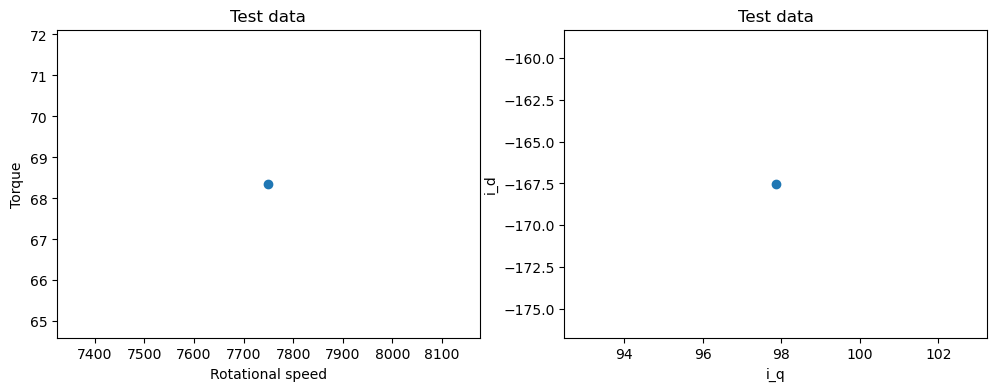

In [9]:
# Specify the main directory
test_path = '/Users/chiragangadi/Uni Siegen/WHB_IAS/02_Data/03_Test'

test_data = DataExtract(test_path, files, columns)
test_data.generate()
test_data.visualisation("Test data")
test_data.save(test_path, "/test_dataset.xlsx", "/test_dataset.h5")